In [1]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
import statistics as stats
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

In [13]:
visitsPerMothPath = r"E:\Downloads\ManducaMultiSenseData\Step5"
duration_path = r"E:\Downloads\ManducaMultiSenseData\Moth_Visits_Information\Duration"
outpath = r"E:\Downloads\ManducaMultiSenseData\Moth_Visits_Information"

In [14]:
moth_list_files = glob.glob(visitsPerMothPath + "\\*.csv")
moth_list_files[0][41:-30]

'L0.1_c-3_m10'

In [15]:
names = []
visit_per_moth = []
light_level = []
successful_visits = []
fed_status = []
ratio_list = []
for moth in moth_list_files:
    df = pd.read_csv(moth)
    name = moth[41:-30]
    visit_number = len(df.In_Frame)
    successful_number = len(df.ProboscisDetect[df.ProboscisDetect.values>0])
    successful_visits.append(successful_number)
    visit_per_moth.append(visit_number)
    ratio_list.append(successful_number/visit_number)
    names.append(name)
    if name.startswith("L50"):  
        light = ["high"]

    elif name.startswith("L0.1"):
        light = ["low"]
    if successful_number > 0:
        fed = ["yes"]
    else:
        fed = ["no"]
        
    fed_status.append(fed)
    light_level.append(light)
    
    duration = []
    pre_duration = []
    post_duration = []

    for dset in df.index:
        dur = df.Out_Frame.values[dset] - df.In_Frame.values[dset]
        if df.ProboscisDetect.values[dset]>0:
            pre_dur = df.ProboscisDetect.values[dset] - df.In_Frame.values[dset]
            post_dur = -df.ProboscisDetect.values[dset]+ df.Out_Frame.values[dset]
        else:
            pre_dur = dur
            post_dur = 0
        duration.append(dur)
        pre_duration.append(pre_dur)
        post_duration.append(post_dur)
    new = pd.DataFrame({'duration': duration, 'pre_duration': pre_duration, 'post_duration': post_duration})
    step5_duration = pd.concat([df,new], axis = 1)
    step5_duration.to_csv(duration_path + "\\" + name + "_duration.csv")
new_df = pd.DataFrame({'name' : names, 'visits' : visit_per_moth, 'ratio': ratio_list, 'successful_visits' : successful_visits,
                        'Fed_Status': list(np.squeeze(fed_status)), 'Light_Level': list(np.squeeze(light_level))})
new_df.to_csv(outpath + "\\Moth_Visits_Table.csv")
names, visit_per_moth, successful_visits, fed_status, light_level

C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


(['L0.1_c-3_m10',
  'L0.1_c-3_m12',
  'L0.1_c-3_m20',
  'L0.1_c-3_m21',
  'L0.1_c-3_m22',
  'L0.1_c-3_m23',
  'L0.1_c-3_m24',
  'L0.1_c-3_m25',
  'L0.1_c-3_m27',
  'L0.1_c-3_m2',
  'L0.1_c-3_m32',
  'L0.1_c-3_m34',
  'L0.1_c-3_m37',
  'L0.1_c-3_m38',
  'L0.1_c-3_m39',
  'L0.1_c-3_m40',
  'L0.1_c-3_m41',
  'L0.1_c-3_m43',
  'L0.1_c-3_m44',
  'L0.1_c-3_m45',
  'L0.1_c-3_m46',
  'L0.1_c-3_m47',
  'L0.1_c-3_m48',
  'L0.1_c-3_m49',
  'L0.1_c-3_m50',
  'L0.1_c-3_m54',
  'L0.1_c-3_m57',
  'L0.1_c-3_m5',
  'L0.1_c-3_m8',
  'L50_c-3_m10',
  'L50_c-3_m12',
  'L50_c-3_m13',
  'L50_c-3_m14',
  'L50_c-3_m15',
  'L50_c-3_m21',
  'L50_c-3_m22',
  'L50_c-3_m24',
  'L50_c-3_m25',
  'L50_c-3_m26',
  'L50_c-3_m2',
  'L50_c-3_m30',
  'L50_c-3_m32',
  'L50_c-3_m33',
  'L50_c-3_m34',
  'L50_c-3_m35',
  'L50_c-3_m37',
  'L50_c-3_m38',
  'L50_c-3_m39',
  'L50_c-3_m45',
  'L50_c-3_m49',
  'L50_c-3_m50',
  'L50_c-3_m51',
  'L50_c-3_m58',
  'L50_c-3_m6',
  'L50_c-3_m9'],
 [4,
  3,
  63,
  63,
  20,
  7,
  1,
  2

In [37]:
moth_data = pd.read_csv(outpath + "\\Moth_Visits_Table.csv")

In [46]:
high_visit_list = moth_data[(moth_data.Light_Level.str.contains("high")) & moth_data.visits.notnull()].visits.values
low_visit_list = moth_data[(moth_data.Light_Level.str.contains("low")) & moth_data.visits.notnull()].visits.values
sc.stats.ks_2samp(high_visit_list, low_visit_list), sc.stats.mannwhitneyu(low_visit_list, high_visit_list, use_continuity=True, alternative='two-sided')

(Ks_2sampResult(statistic=0.2718832891246684, pvalue=0.20835369788239588),
 MannwhitneyuResult(statistic=492.0, pvalue=0.05338031874970472))

In [48]:
high_succ_list = moth_data[(moth_data.Light_Level.str.contains("high"))].successful_visits.values
low_succ_list = moth_data[(moth_data.Light_Level.str.contains("low"))].successful_visits.values
sc.stats.ks_2samp(low_succ_list, high_succ_list), sc.stats.mannwhitneyu(low_succ_list, high_succ_list, use_continuity=True, alternative='two-sided')

(Ks_2sampResult(statistic=0.3819628647214854, pvalue=0.02577811840914135),
 MannwhitneyuResult(statistic=489.5, pvalue=0.0551971889681918))

In [50]:
high_ratio_list = moth_data[(moth_data.Light_Level.str.contains("high"))].ratio.values
low_ratio_list = moth_data[(moth_data.Light_Level.str.contains("low"))].ratio.values
sc.stats.ks_2samp(low_ratio_list, high_ratio_list), sc.stats.mannwhitneyu(low_ratio_list, high_ratio_list, use_continuity=True, alternative='two-sided')

(Ks_2sampResult(statistic=0.3063660477453581, pvalue=0.11515974297431497),
 MannwhitneyuResult(statistic=501.0, pvalue=0.03455289385288322))

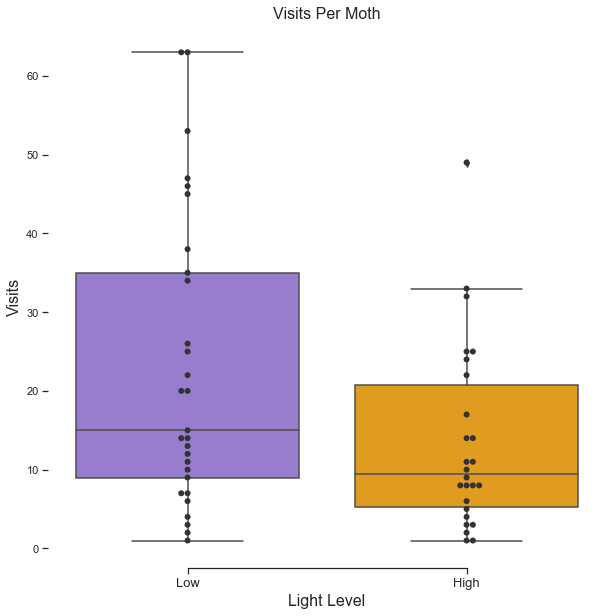

In [41]:
sns.set(style="ticks")

f, ax = plt.subplots(figsize=(10, 10))


# Plot the orbital period with horizontal boxes
sns.boxplot(x="Light_Level", y="visits", data=moth_data,
           palette=['mediumpurple','orange'])

# Add in points to show each observation
sns.swarmplot(x="Light_Level", y="visits", data=moth_data,
              size=6, color="0.2", linewidth=0)

high_visit = len(moth_data[(moth_data.Light_Level.str.contains("high")) & moth_data.visits.notnull()].index)
low_visit = len(moth_data[(moth_data.Light_Level.str.contains("low")) & moth_data.visits.notnull()].index)

lineb = ax.plot(np.zeros(0), '-b')
liner = ax.plot(np.zeros(0), '-r')
lines = (lineb,liner)


# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set_ylabel("Visits", size = 16)
ax.set_xlabel("Light Level", size = 16)
ax.set_title("Visits Per Moth", size = 16)
ax.set_xticklabels(["Low","High"], size = 13)
sns.despine(trim=True, left=True)
# plt.savefig(outpath_fig + "\\VisitsPerMoth_Box.png")

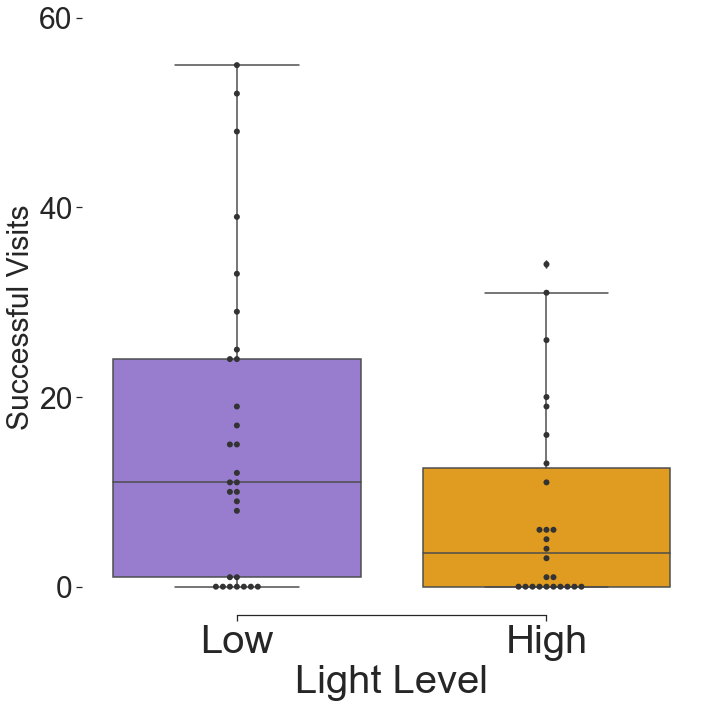

In [27]:
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 10))


# Plot the orbital period with horizontal boxes
sns.boxplot(x="Light_Level", y="successful_visits", data=moth_data,
           palette=['mediumpurple','orange'])

# Add in points to show each observation
sns.swarmplot(x="Light_Level", y="successful_visits", data=moth_data,
              size=6, color="0.2", linewidth=0)

high_fed = len(moth_data[(moth_data.Light_Level.str.contains("high")) & moth_data.Fed_Status.str.contains("yes")].index)
low_fed = len(moth_data[(moth_data.Light_Level.str.contains("low")) & moth_data.Fed_Status.str.contains("yes")].index)

# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set_ylabel("Successful Visits", size = 30)
ax.set_xlabel("Light Level", size = 40)
ax.set_xticklabels(["Low","High"], size = 40)
for tick in ax.get_yticklabels():
    tick.set_fontsize(30) 
# ax.set_title("Ratio of Successful Visits Per Moth", size = 40)
ax.set_ylim(-3,60)
ax.locator_params(nbins=4, axis = "y")


# ax.text(0.66, 1.3,'N = ' +str(high_fed)  + "/" + str(high_visit), color = 'orange', weight = 'bold', size = 30)
# ax.text(0.66, 1.1, 'N = ' + str(low_fed) + "/" + str(low_visit), color = 'mediumpurple', weight = 'bold', size = 30)
sns.despine(trim=True, left=True)
plt.tight_layout()
# plt.savefig(outpath + "//SuccessfulVisits.png")

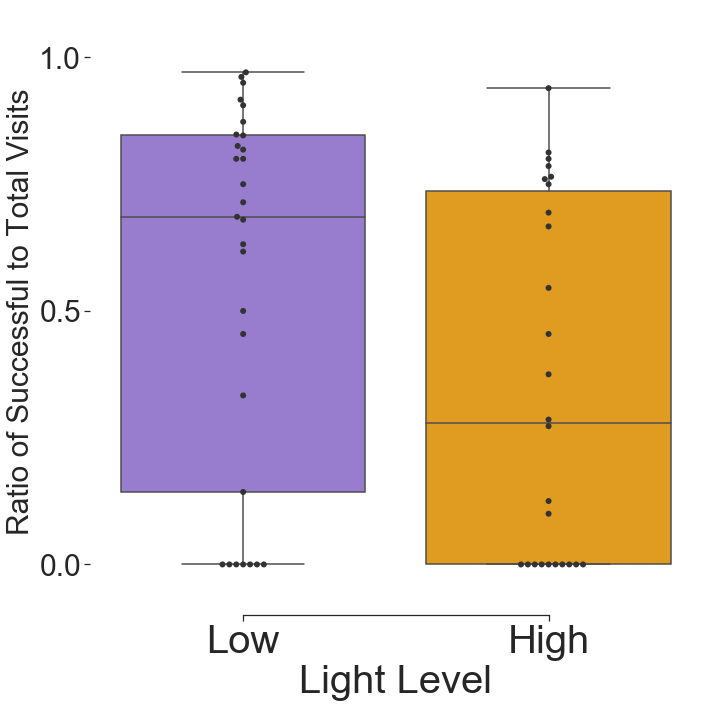

In [28]:
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 10))


# Plot the orbital period with horizontal boxes
sns.boxplot(x="Light_Level", y="ratio", data=moth_data,
           palette=['mediumpurple','orange'])

# Add in points to show each observation
sns.swarmplot(x="Light_Level", y="ratio", data=moth_data,
              size=6, color="0.2", linewidth=0)

high_fed = len(moth_data[(moth_data.Light_Level.str.contains("high")) & moth_data.Fed_Status.str.contains("yes")].index)
low_fed = len(moth_data[(moth_data.Light_Level.str.contains("low")) & moth_data.Fed_Status.str.contains("yes")].index)

# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set_ylabel("Ratio of Successful to Total Visits", size = 30)
ax.set_xlabel("Light Level", size = 40)
ax.set_xticklabels(["Low","High"], size = 40)
for tick in ax.get_yticklabels():
    tick.set_fontsize(30) 
# ax.set_title("Ratio of Successful Visits Per Moth", size = 40)
ax.set_ylim(-0.1,1.1)
ax.locator_params(nbins=4, axis = "y")


# ax.text(0.66, 1.3,'N = ' +str(high_fed)  + "/" + str(high_visit), color = 'orange', weight = 'bold', size = 30)
# ax.text(0.66, 1.1, 'N = ' + str(low_fed) + "/" + str(low_visit), color = 'mediumpurple', weight = 'bold', size = 30)
sns.despine(trim=True, left=True)
plt.tight_layout()
# plt.savefig(outpath + "//RatioOfSuccessfulToTotalVisits.png")

In [25]:
test_stat = np.mean(moth_data.ratio[moth_data.Light_Level == "low"]) - np.mean(moth_data.ratio[moth_data.Light_Level == "high"])
test_stat

0.20136044609114917

In [26]:
# resample
def null_perm_test():
    null_trt = np.random.choice(moth_data.Light_Level, replace = False, size = len(moth_data.Light_Level))
    null_test_stat = np.mean(moth_data.ratio[null_trt == "low"]) - np.mean(moth_data.ratio[null_trt == "high"]) 
    return(null_test_stat)

# resample 10000 times to generate sampling distribution under the null hypothesis
null_dist = np.array([null_perm_test() for ii in range(10000)])

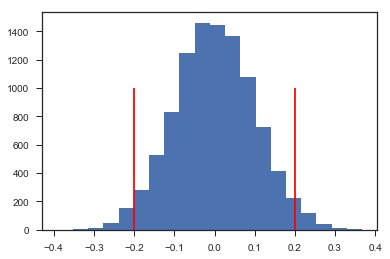

In [27]:
plt.hist(null_dist, bins= 20)
plt.vlines(x = test_stat, ymin = 0, ymax =1000, color = "red")
plt.vlines(x = -test_stat, ymin = 0, ymax =1000, color = "red")
plt.show()

In [28]:
pval = np.mean((null_dist >= test_stat) | (-test_stat >= null_dist) )
pval

0.0461

In [ ]:
moth_data[(moth_data.Light_Level.str.contains("high"))].values

In [ ]:
moth_data = pd.read_csv(r"C:\Users\Daniellab\Documents\TanviStuff\MultiSensory\Lightlevel-FlowerShape\MothChart-LightLevel-FlowerShape.csv")
high_visit_flower = len(moth_data[(moth_data.Animal_Name.str.contains("L50_c-3")) & moth_data.Total_trials.notnull()].index)
low_visit_flower = len(moth_data[(moth_data.Animal_Name.str.contains("L0.1_c-3")) & moth_data.Total_trials.notnull()].index)
high_visit_flower, low_visit_flower

In [ ]:
duration_list = glob.glob(duration_path + "\\*duration.csv")
df1 = []
df2 = []
df3 = []
df4 = []
df5 = []
df6 = []
df7 = []
df8 = []
df9 = []

for file in duration_list:
    df = pd.read_csv(file)
    nam = file[79:-13]
    name = [nam]*len(df["In_Frame"])
    if nam.startswith("L50"):
        light = ["high"]*len(df["In_Frame"])
    else: 
        light = ["low"]*len(df["In_Frame"])
    df1.extend(name)
    df2.extend(df.In_Frame)
    df3.extend(df.Out_Frame)
    df4.extend(df.ProboscisDetect)
    df5.extend(df.DiscoveryTime)
    df6.extend(df.duration)
    df7.extend(df.pre_duration)
    df8.extend(df.post_duration)
    df9.extend(light)
new_df = pd.DataFrame({'name': df1, 'In_Frame': df2, 'Out_Frame': df3, 'ProboscisDetect':df4, 
                      'DiscoveryTime': df5, 'duration': df6, 'pre_duration': df7, 'post_duration': df8, 'Light_Level': list(np.squeeze(df9))})
new_df.to_csv(duration_path + "\\all_moth_durations.csv")

In [ ]:
duration_data = pd.read_csv(duration_path + "\\all_moth_durations.csv") 
duration_data['duration(s)'] = pd.Series(duration_data['duration'].values/100, index=duration_data.index)

sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(30, 15))


# Plot the orbital period with horizontal boxes
sns.violinplot(x="name", y="duration(s)", hue = "Light_Level", dodge=False, data=duration_data,
          inner="quart",
           palette=['mediumpurple','darkorange'])

# Add in points to show each observation
sns.swarmplot(x="name", y="duration(s)", data=duration_data,
              size=5, color="0.6", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.tick_params(axis='x', which='major', labelsize=17,  rotation=90)
ax.tick_params(axis='y', which='major', labelsize=17)
ax.set_ylabel("Duration (s)",  size = 30, labelpad=10)
ax.set_xlabel("Moth",  size = 30, labelpad=20)
ax.set_title("Duration of each visit for each moth", size = 40)
ax.legend(prop={'size': 20})
sns.despine(trim=True, left=True)
plt.savefig(outpath_fig + "\\DurationPerVisitPerMoth_Violin.png")

In [ ]:
# duration without outliers
from scipy import stats
z = np.abs(stats.zscore(duration_data['duration(s)'].values))
outlier_ID = z > 5
duration_data['zscore'] = z
duration_data['outlier_ID'] = outlier_ID
notoutliers_dur = duration_data[duration_data.outlier_ID == False]

In [ ]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(30, 15))


# Plot the orbital period with horizontal boxes
sns.violinplot(x="name", y="duration(s)", hue = "Light_Level", dodge=False, data=notoutliers_dur,inner="quart",
           palette=['mediumpurple','darkorange'])

# Add in points to show each observation
sns.swarmplot(x="name", y="duration(s)", data=notoutliers_dur,
              size=5, color="0.6", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.tick_params(axis='x', which='major', labelsize=17,  rotation=90)
ax.tick_params(axis='y', which='major', labelsize=17)
ax.set_ylabel("Duration (s)",  size = 30, labelpad=10)
ax.set_xlabel("Moth",  size = 30, labelpad=20)
ax.set_title("Duration of each visit for each moth. No outliers", size = 40)
ax.legend(prop={'size': 20})
sns.despine(trim=True, left=True)
plt.savefig(outpath_fig + "\\NoOutliers_DurationPerVisitPerMoth_Violin.png")